In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import os, uuid, matplotlib
import numpy as np
# sns.set_style("whitegrid")

os.chdir(u'C:/Users/Lukas/PythonEditorWrapper_939b26c0-5643-4d4b-ae56-0351a73093c9')
dataset = pd.read_csv('input_df_4632cabf-c359-4882-988e-547cd63191d2.csv')
# dataset = dataset.set_index("Country")

dataset.head()

,Country,2020,deviation indicator
0,AT,2,late: < 5 days
1,AT,2,late: 5 to 15 days
2,DE,13,In Time
3,DE,7,late: < 5 days
4,GB,6,late: < 5 days


df = pd.DataFrame(dataset["2020"], columns=dataset["Country"])
df

dataset.set_index("deviation indicator")

dataset.groupby("Country")["2020"].apply(list).apply(pd.Series).T

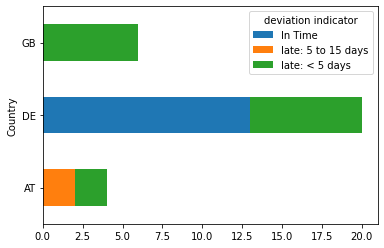

In [5]:
df = dataset.pivot(columns="Country", values="2020", index="deviation indicator")
df = df.fillna(0).T
# df.plot(kind="barh", stacked=True)

df

df.plot(kind="barh", stacked=True)

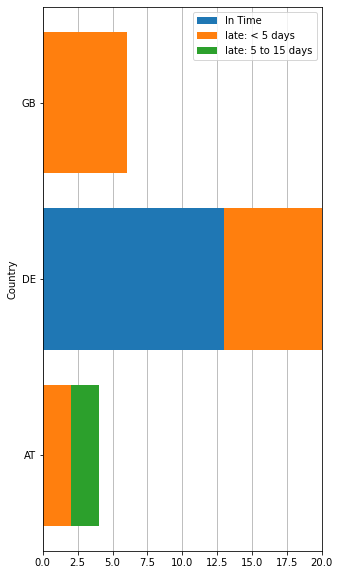

In [15]:
df = dataset.pivot(columns="Country", values="2020", index="deviation indicator")
df = df.fillna(0).T
fig, ax = plt.subplots(figsize=(5,10))

try:
    p1 = ax.barh(df.index, df["In Time"], label="In Time")
except:
    pass
try:
    p2 = ax.barh(df.index, df["late: < 5 days"], left=df["In Time"], label="late: < 5 days")
except:
    pass
try:
    adding = np.add(df["In Time"],df["late: < 5 days"]).tolist()
    p3 = ax.barh(df.index, df["late: 5 to 15 days"], left=adding, label="late: 5 to 15 days")
except:
    pass    
try:
    adding2 = np.add(adding,df["late: 5 to 15 days"]).tolist()
    p4 = ax.barh(df.index, df["late: > 15 days"], left=adding2, label="late: > 15 days")
except:
    pass


ax.set_ylabel("Country")
ax.legend()
ax.xaxis.grid()
ax.set_axisbelow(True)

plt.show()